# Covid-19 time series data analysis

## Group members: 
Nabiha Nasir Orpa,
Lucas Braga Carani,
Steven Foster

### Import libraries

In [1]:
#import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

### Import data

In [2]:
#data souce: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

# no of cases confirmed
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
# no of deaths
death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
# no of recovered cases
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

### Data Cleaning

In [3]:
#removing rows with wrong lat long

confirmed=confirmed[confirmed.Lat!= 0]
confirmed=confirmed[confirmed.Long!= 0]

death=death[death.Lat!= 0]
death=death[death.Long!= 0]

recovered=recovered[recovered.Lat!= 0]
recovered=recovered[recovered.Long!= 0]

In [4]:
#Checking if there is any NAN value in confirmed data frame
confirmed.isnull().sum()

Province/State    180
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/17/20             0
4/18/20             0
4/19/20             0
4/20/20             0
4/21/20             0
Length: 95, dtype: int64

In [5]:
#Replacing NAN values from confirmed data frame

confirmed['Province/State'].fillna(confirmed['Country/Region'], inplace=True) 
confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0    Afghanistan    Afghanistan  33.0000  65.0000        0        0        0   
1        Albania        Albania  41.1533  20.1683        0        0        0   
2        Algeria        Algeria  28.0339   1.6596        0        0        0   
3        Andorra        Andorra  42.5063   1.5218        0        0        0   
4         Angola         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0        0  ...      607      665      714      784   
1        0        0        0  ...      446      467      475      494   
2        0        0        0  ...     1914     1983     2070     2160   
3        0        0        0  ...      638      646      659      673   
4        0        0        0  ...       19       19       19       19   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0      840      906      933      996     1026     1092  
1      518      539      548      562      584      609  
2     2268     2418     2534     2629     2718     2811  
3      673      696      704      713      717      717  
4       19       19       24       24       24       24  

[5 rows x 95 columns]

In [6]:
#Replacing NAN values from death and recovered data frame

death.isnull().sum()
recovered.isnull().sum()
death['Province/State'].fillna(death['Country/Region'], inplace=True) 
recovered['Province/State'].fillna(recovered['Country/Region'], inplace=True) 

### Saving data in csv format

In [7]:
#saving data to csv files
confirmed.to_csv('confirmed.csv')
death.to_csv('death.csv')
recovered.to_csv('recovered.csv')

### Data frame preview

In [8]:
#confirmed case data
confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0    Afghanistan    Afghanistan  33.0000  65.0000        0        0        0   
1        Albania        Albania  41.1533  20.1683        0        0        0   
2        Algeria        Algeria  28.0339   1.6596        0        0        0   
3        Andorra        Andorra  42.5063   1.5218        0        0        0   
4         Angola         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0        0  ...      607      665      714      784   
1        0        0        0  ...      446      467      475      494   
2        0        0        0  ...     1914     1983     2070     2160   
3        0        0        0  ...      638      646      659      673   
4        0        0        0  ...       19       19       19       19   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0      840      906      933      996     1026     1092  
1      518      539      548      562      584      609  
2     2268     2418     2534     2629     2718     2811  
3      673      696      704      713      717      717  
4       19       19       24       24       24       24  

[5 rows x 95 columns]

In [9]:
#death case data
death.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0    Afghanistan    Afghanistan  33.0000  65.0000        0        0        0   
1        Albania        Albania  41.1533  20.1683        0        0        0   
2        Algeria        Algeria  28.0339   1.6596        0        0        0   
3        Andorra        Andorra  42.5063   1.5218        0        0        0   
4         Angola         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0        0  ...       18       21       23       25   
1        0        0        0  ...       23       23       24       25   
2        0        0        0  ...      293      313      326      336   
3        0        0        0  ...       29       29       31       33   
4        0        0        0  ...        2        2        2        2   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0       30       30       30       33       36       36  
1       26       26       26       26       26       26  
2      348      364      367      375      384      392  
3       33       35       35       36       37       37  
4        2        2        2        2        2        2  

[5 rows x 95 columns]

In [10]:
#recovered case data
recovered.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0    Afghanistan    Afghanistan  33.0000  65.0000        0        0        0   
1        Albania        Albania  41.1533  20.1683        0        0        0   
2        Algeria        Algeria  28.0339   1.6596        0        0        0   
3        Andorra        Andorra  42.5063   1.5218        0        0        0   
4         Angola         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0        0  ...       32       32       40       43   
1        0        0        0  ...      217      232      248      251   
2        0        0        0  ...      591      601      691      708   
3        0        0        0  ...      128      128      128      169   
4        0        0        0  ...        4        4        5        5   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0       54       99      112      131      135      150  
1      277      283      302      314      327      345  
2      783      846      894     1047     1099     1152  
3      169      191      205      235      248      282  
4        5        5        6        6        6        6  

[5 rows x 95 columns]

### Information about data collection

In [11]:
#important information about the data collection
#data collection starting date
first_date=confirmed.columns[4]
print('Data collection starting date:{}'.format(first_date))

#last date of the data
last_date=confirmed.columns[-1]
print('Last date of data collection:{}'.format(last_date))

Data collection starting date:1/22/20
Last date of data collection:4/21/20


### Affected countries

In [12]:
#First affected countries
index_first_affected=confirmed.index[confirmed[confirmed.columns[4]]!=0]
print('Countries that are affected from the starting of data collection:{}'.format(confirmed.loc[index_first_affected]['Country/Region'].unique())+'\n')

#Total affected countries
print('Number of total affected countries:{}\n'.format(len(confirmed['Country/Region'].unique())))

affected_countries=confirmed['Country/Region'].unique()
print('Covid-19 affected countries are:\n {}'.format(affected_countries))


Countries that are affected from the starting of data collection:['China' 'Japan' 'Korea, South' 'Taiwan*' 'Thailand' 'US']

Number of total affected countries:183

Covid-19 affected countries are:
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary' 

### Worldwide situation

In [13]:
#Current situation

last_date_confirmed=sum(confirmed[last_date])
print('Total confirmed cases:{}\n'.format(last_date_confirmed))

last_date_deaths=sum(death[last_date])
print('Total number of deaths:{}\n'.format(last_date_deaths))

last_date_recovered=sum(recovered[last_date])
print('Total number of recovered cases:{}\n'.format(last_date_recovered))

Total confirmed cases:2560323

Total number of deaths:176969

Total number of recovered cases:679175



In [14]:
#function to find the increased number of cases 

def increase(case):
    #The increasing rate of confirmed patient
    case_number_date_wise = case.sum()[4:]
    increased_case_date_wise=[]
    dates=case.columns[4:]
    n=1

    while n<len(dates):
        increased_case_date_wise.append(case_number_date_wise[dates[n]]-case_number_date_wise[dates[n-1]])
        n+=1

    dates_in_format = mdates.num2date(mdates.datestr2num(dates[1:]))
    return increased_case_date_wise, dates_in_format

C:\Users\nabih\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


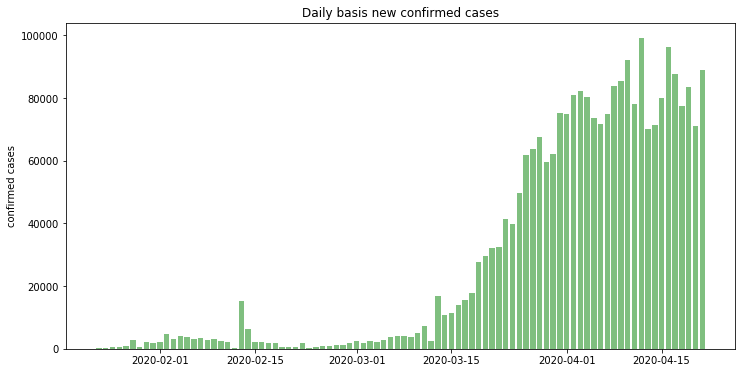

In [15]:
#new confirmed cases per day
increased_confirmed_case_date_wise,dates_in_format= increase(confirmed)

plt.rcParams['figure.figsize']=(12,6) #to define the figure size

fig=plt.bar(dates_in_format, increased_confirmed_case_date_wise, align='center', alpha=0.5, color='g')
plt.ylabel('confirmed cases')
plt.title('Daily basis new confirmed cases')

plt.show()

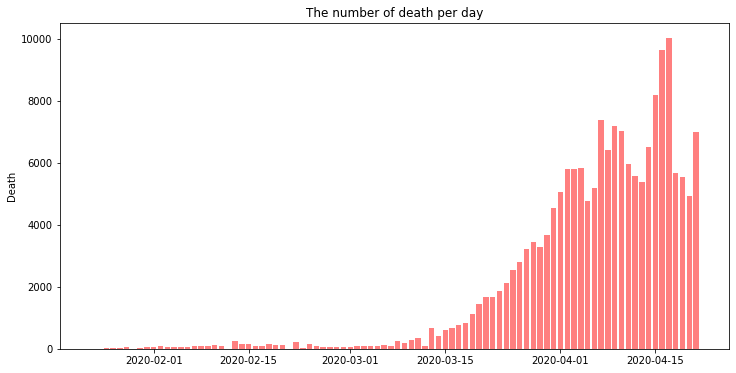

In [16]:
#Death per day

increased_death_case_date_wise,dates_in_format= increase(death)

plt.rcParams['figure.figsize']=(12,6) #to define the figure size

plt.bar(dates_in_format, increased_death_case_date_wise, align='center', alpha=0.5, color='r')
plt.ylabel('Death')
plt.title('The number of death per day')

plt.show()

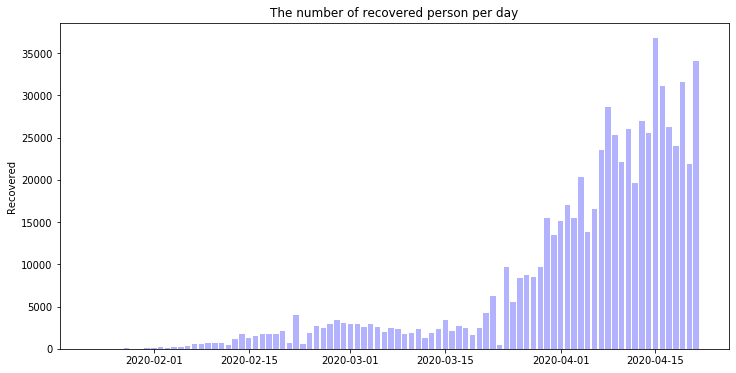

In [17]:
#Recovered per day

increased_recovered_case_date_wise,dates_in_format= increase(recovered)


plt.rcParams['figure.figsize']=(12,6) #to define the figure size

plt.bar(dates_in_format, increased_recovered_case_date_wise, align='center', alpha=0.3, color='b')
plt.ylabel('Recovered')
plt.title('The number of recovered person per day')

plt.show()

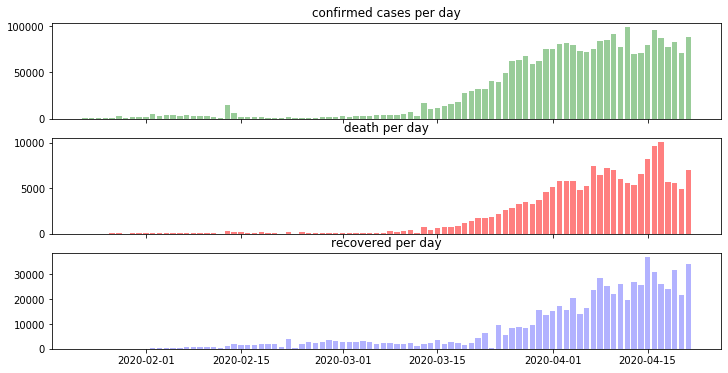

In [18]:
#Comparing the increasing trend of confirmed, death and recovered cases

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

#The increasing rate of confirmed patient
ax1.bar(dates_in_format, increased_confirmed_case_date_wise, align='center', alpha=0.4, color='g')
ax1.set_title('confirmed cases per day')

#The increasing rate of dead patient
ax2.bar(dates_in_format,  increased_death_case_date_wise, align='center', alpha=0.5, color='r')
ax2.set_title('death per day')

#The increasing rate of recovered patient
ax3.bar(dates_in_format,  increased_recovered_case_date_wise, align='center', alpha=0.3, color='b')
ax3.set_title('recovered per day')

plt.rcParams['figure.figsize']=(10,8)
plt.show()

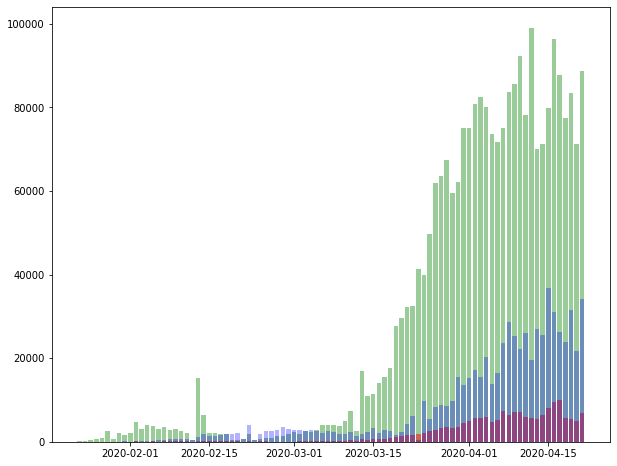

In [19]:
#Comparing the increasing trend of confirmed, death and recovered cases


#The increasing rate of confirmed patient
plt.bar(dates_in_format, increased_confirmed_case_date_wise, align='center', alpha=0.4, color='g')


#The increasing rate of dead patient
plt.bar(dates_in_format,  increased_death_case_date_wise, align='center', alpha=0.5, color='r')


#The increasing rate of recovered patient
plt.bar(dates_in_format,  increased_recovered_case_date_wise, align='center', alpha=0.3, color='b')


plt.rcParams['figure.figsize']=(10,6)
plt.show()

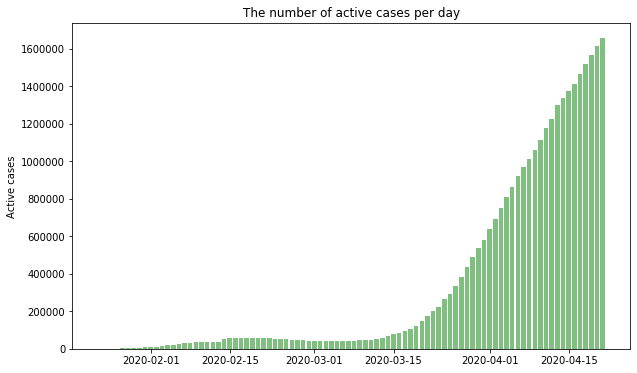

In [20]:
#Active cases per day

confirmed_number_date_wise = confirmed.sum()[4:]
recovered_number_date_wise = recovered.sum()[4:]
death_number_date_wise = death.sum()[4:]

active_each_day=[]
n=0
dates=confirmed.columns[4:]

while n<len(increased_confirmed_case_date_wise):
    active_each_day.append(confirmed_number_date_wise[n]-recovered_number_date_wise[n]-death_number_date_wise[n])
    n+=1


plt.rcParams['figure.figsize']=(10,6) #to define the figure size

dates_in_format = mdates.num2date(mdates.datestr2num(dates[1:]))
plt.bar(dates_in_format, active_each_day, align='center', alpha=0.5, color='g')
plt.ylabel('Active cases')
plt.title('The number of active cases per day')

plt.show()

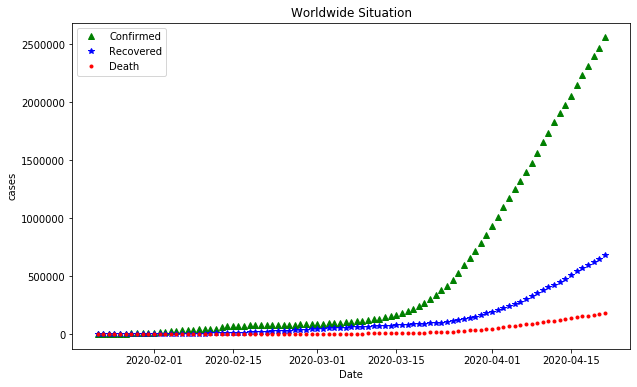

In [21]:
#Cumuliative graph worldwide

fig, ax = plt.subplots(figsize = (10,6)) # width, height in inches.


all_confirmed_number_date_wise = confirmed.sum()[4:]


dates_in_format = mdates.num2date(mdates.datestr2num(dates))

plt.plot(dates_in_format, confirmed_number_date_wise, 'g^', label="Confirmed")
plt.plot(dates_in_format, recovered_number_date_wise, 'b*', label="Recovered")
plt.plot(dates_in_format, death_number_date_wise, 'r.', label="Death")

plt.legend(loc="upper left")
ax.set(xlabel='Date', ylabel='cases', title='Worldwide Situation')

plt.show()

### Organizing data countrywise
As there are some countries which has data provience or statewise. We are adding all the states' data and representing countrywise.

In [22]:
#country wise data
country_wise_confiremed=confirmed.groupby('Country/Region').sum()
country_wise_death=death.groupby('Country/Region').sum()
country_wise_recovered=recovered.groupby('Country/Region').sum()

In [23]:
#introducing new data frame 'latest' which will represent the total confirmed, death and recovered cases countrywise

latest=pd.DataFrame(columns = ['country','confirmed', 'death', 'recovered'])

for i in affected_countries:
    confirmed_latest=country_wise_confiremed.loc[i][last_date]
    death_latest=country_wise_death.loc[i][last_date]
    recovered_latest=country_wise_recovered.loc[i][last_date]
    latest=latest.append({'country' : i , 'confirmed' : confirmed_latest, 'death' : death_latest, 'recovered' : recovered_latest},ignore_index=True)

latest.head()    

country  confirmed  death  recovered
0  Afghanistan     1092.0   36.0      150.0
1      Albania      609.0   26.0      345.0
2      Algeria     2811.0  392.0     1152.0
3      Andorra      717.0   37.0      282.0
4       Angola       24.0    2.0        6.0

### Top 10 countries with highest confirmed cases

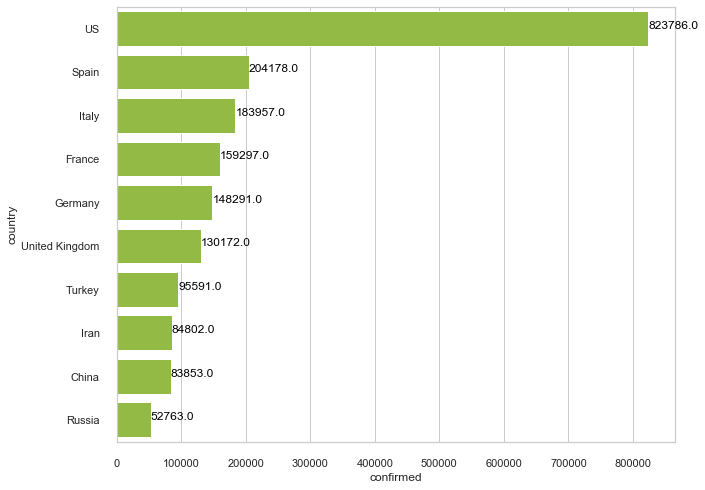

In [24]:
plt.style.use('seaborn-poster')
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style('whitegrid')

#sorting the data according to highest number of confirmed cases
latest.sort_values('confirmed',ascending=False, inplace=True)

f,ax= plt.subplots(figsize=(10,8))

sns.barplot(x='confirmed', y='country', data=latest.head(10), label='Confirmed cases', color='yellowgreen')

for i, v in enumerate(latest['confirmed'].head(10)):
    ax.text(v, i, str(v), color='black')

### Comparing the number of confirmed, death and recovered cases of highly affected countries

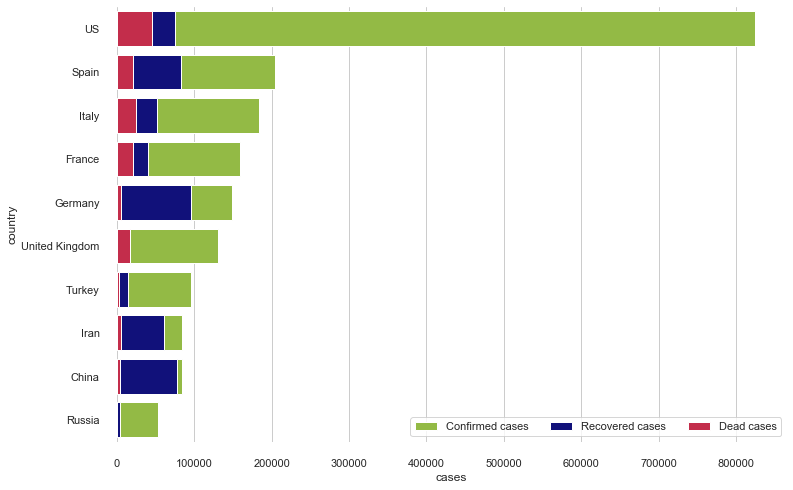

In [25]:
plt.style.use('seaborn-poster')
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style('whitegrid')

latest.sort_values('confirmed',ascending=False, inplace=True)

f,ax= plt.subplots(figsize=(12,8))


sns.barplot(x='confirmed', y='country', data=latest.head(10), label='Confirmed cases', color='yellowgreen')

sns.barplot(x='recovered', y='country', data=latest.head(10), label='Recovered cases', color='darkblue')

sns.barplot(x='death', y='country', data=latest.head(10), label='Dead cases', color='crimson')

ax.legend(ncol=3, loc='lower right', frameon=True)
ax.set(xlabel='cases')
sns.despine(left=True, bottom=True)


Enter country name:Bangladesh

Confirmed case:3382.0

Death:110.0

Recovered:87.0



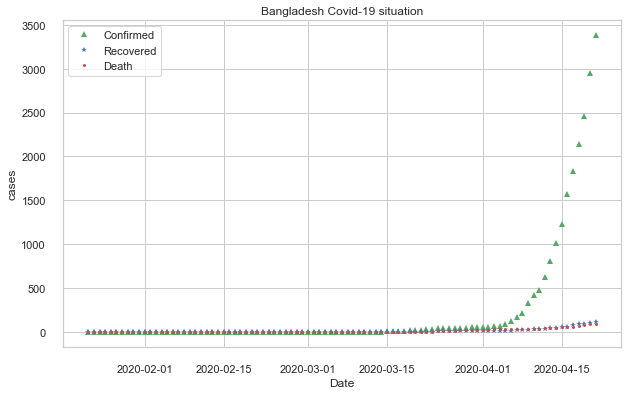

In [26]:
user_input= input('Enter country name:')
print('\nConfirmed case:'+str(country_wise_confiremed.loc[user_input][last_date])+'\n')
print('Death:'+str(country_wise_death.loc[user_input][last_date])+'\n')
print('Recovered:'+str(country_wise_recovered.loc[user_input][last_date])+'\n')

fig, ax = plt.subplots(figsize = (10,6)) # width, height in inches.

confirmed_number_date_country_wise = country_wise_confiremed.loc[user_input][2:]


dates_in_format = mdates.num2date(mdates.datestr2num(dates))

plt.plot(dates_in_format, country_wise_confiremed.loc[user_input][2:], 'g^', label="Confirmed")
plt.plot(dates_in_format, country_wise_death.loc[user_input][2:], 'b*', label="Recovered")
plt.plot(dates_in_format, country_wise_recovered.loc[user_input][2:], 'r.', label="Death")

plt.legend(loc="upper left")
ax.set(xlabel='Date', ylabel='cases', title=str(user_input)+" Covid-19 situation")

plt.show()


In [27]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


### Geographical view of number of confirmed, dead and recovered patient

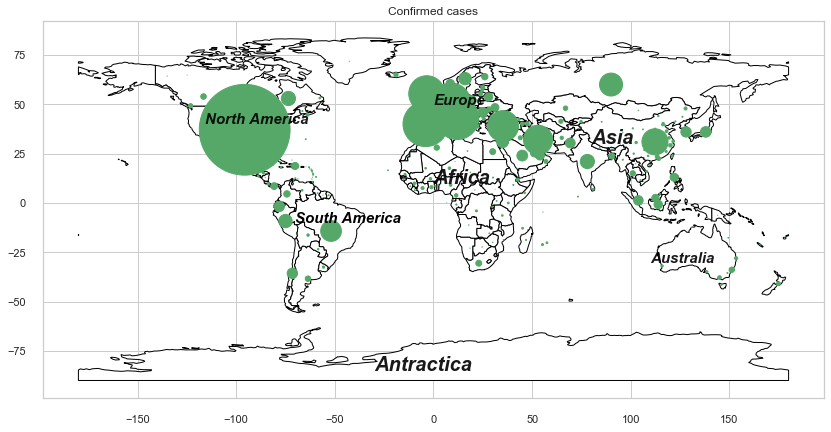

In [28]:
import geopandas

#creating a geo dataframe 

gdf_confirmed = geopandas.GeoDataFrame(
    confirmed, geometry=geopandas.points_from_xy(confirmed.Long, confirmed.Lat))

#loading world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#for figure size
plt.rcParams['figure.figsize']=(14,20)

#ploting world map
ax = world.plot(color='white', edgecolor='black')


#plot GeoDataFrame
radius=gdf_confirmed[gdf_confirmed.columns[-2]]*.01 #how the red dot mark will change based on the confirmed cases
gdf_confirmed.plot(ax=ax, color='g', marker='o', markersize=radius)

#Continent names as text lines
ax.text(-116,40, 'North America', style='italic', alpha= 0.9, color= 'black',size=15,fontweight='bold')
ax.text(-70,-10, 'South America', style='italic', alpha= 1, color= 'black', size=15, fontweight='bold')
ax.text(0,50, 'Europe', style='italic', alpha= 0.9, color= 'black', size=15, fontweight='bold')
ax.text(80,30, 'Asia', style='italic', alpha= 0.9, color= 'black',size=20, fontweight='bold')
ax.text(0,10, 'Africa', style='italic', alpha= 0.9, color= 'black',size=20, fontweight='bold')
ax.text(110,-30, 'Australia', style='italic', alpha= 0.9, color= 'black',size=15, fontweight='bold')
ax.text(-30,-85, 'Antractica', style='italic', alpha= 0.9, color= 'black',size=20, fontweight='bold')

ax.set(title='Confirmed cases')

plt.show()


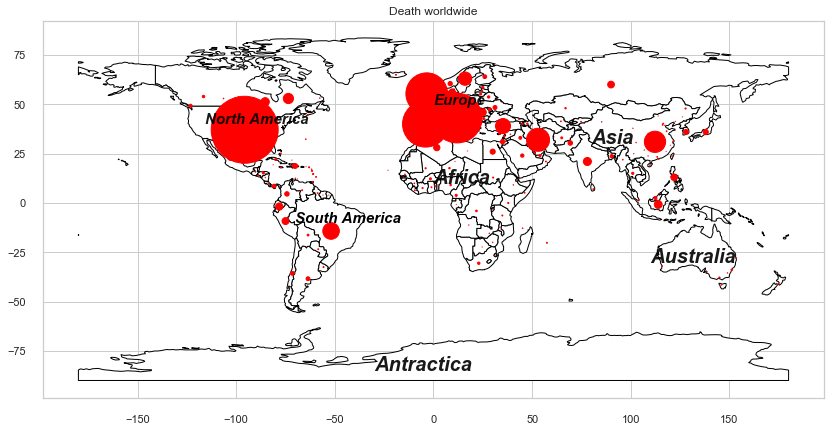

In [29]:
import geopandas

#creating a geo dataframe 

gdf_death = geopandas.GeoDataFrame(
    death, geometry=geopandas.points_from_xy(death.Long, death.Lat))

#loading world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#for figure size
plt.rcParams['figure.figsize']=(14,20)

#ploting world map
ax = world.plot(color='white', edgecolor='black')


#plot GeoDataFrame
radius=(gdf_death[gdf_death.columns[-2]])*.1 #how the red dot mark will change based on the confirmed cases
gdf_death.plot(ax=ax, color='red', marker='o', markersize=radius)

#Continent names as text lines
ax.text(-116,40, 'North America', style='italic', alpha= 0.9, color= 'black',size=15,fontweight='bold')
ax.text(-70,-10, 'South America', style='italic', alpha= 1, color= 'black', size=15,fontweight='bold')
ax.text(0,50, 'Europe', style='italic', alpha= 0.9, color= 'black', size=15,fontweight='bold')
ax.text(80,30, 'Asia', style='italic', alpha= 0.9, color= 'black',size=20,fontweight='bold')
ax.text(0,10, 'Africa', style='italic', alpha= 0.9, color= 'black',size=20,fontweight='bold')
ax.text(110,-30, 'Australia', style='italic', alpha= 0.9, color= 'black',size=20,fontweight='bold')
ax.text(-30,-85, 'Antractica', style='italic', alpha= 0.9, color= 'black',size=20,fontweight='bold')

ax.set(title='Death worldwide')

plt.show()


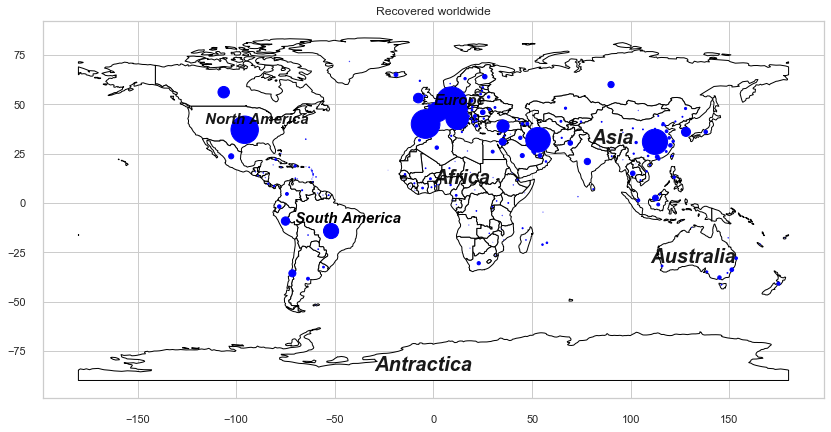

In [30]:
import geopandas

#creating a geo dataframe 

gdf_recovered = geopandas.GeoDataFrame(
    recovered, geometry=geopandas.points_from_xy(recovered.Long, recovered.Lat))

#loading world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#for figure size
plt.rcParams['figure.figsize']=(14,20)

#ploting world map
ax = world.plot(color='white', edgecolor='black')


#plot GeoDataFrame
radius=(gdf_recovered[gdf_recovered.columns[-2]])*.01 #how the red dot mark will change based on the confirmed cases
gdf_recovered.plot(ax=ax, color='blue', marker='o', markersize=radius)

#Continent names as text lines
ax.text(-116,40, 'North America', style='italic', alpha= 0.9, color= 'black',size=15,fontweight='bold')
ax.text(-70,-10, 'South America', style='italic', alpha= 1, color= 'black', size=15,fontweight='bold')
ax.text(0,50, 'Europe', style='italic', alpha= 0.9, color= 'black', size=15,fontweight='bold')
ax.text(80,30, 'Asia', style='italic', alpha= 0.9, color= 'black',size=20,fontweight='bold')
ax.text(0,10, 'Africa', style='italic', alpha= 0.9, color= 'black',size=20,fontweight='bold')
ax.text(110,-30, 'Australia', style='italic', alpha= 0.9, color= 'black',size=20,fontweight='bold')
ax.text(-30,-85, 'Antractica', style='italic', alpha= 0.9, color= 'black',size=20,fontweight='bold')

ax.set(title='Recovered worldwide')
plt.show()


### Getting the total cases from Florida

#### Function
This function allows to collect the data provided by an online API related to COVID-19 cases

In [31]:
#function to get cases in specific place
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

def getStats(country):
        #url API
    api_url = 'https://api.smartable.ai/coronavirus/stats/'+country
    api_params = {
        'Cache-Control': 'no-cache',
        'Subscription-Key':"67ec93439801412c9342c04ae0c69a8b" ,
    }
    r = requests.get(url=api_url, params=api_params) 
    return r.text

In [32]:
#Getting the data from Florida using the function
data = getStats("US-FL")
jsonData = json.loads(data)
country = jsonData["location"]["countryOrRegion"]
country_popn=jsonData["location"]['provinceOrState']
history = pd.DataFrame(jsonData["stats"]['history'])
history['date']=pd.to_datetime(history['date'])
history

date  confirmed  deaths  recovered
0  2020-01-22          0       0          0
1  2020-01-23          0       0          0
2  2020-01-24          0       0          0
3  2020-01-25          0       0          0
4  2020-01-26          0       0          0
..        ...        ...     ...        ...
87 2020-04-18      25492     748        174
88 2020-04-19      26314     774        174
89 2020-04-20      27058     823        174
90 2020-04-21      27869     867        174
91 2020-04-22      28309     893        174

[92 rows x 4 columns]

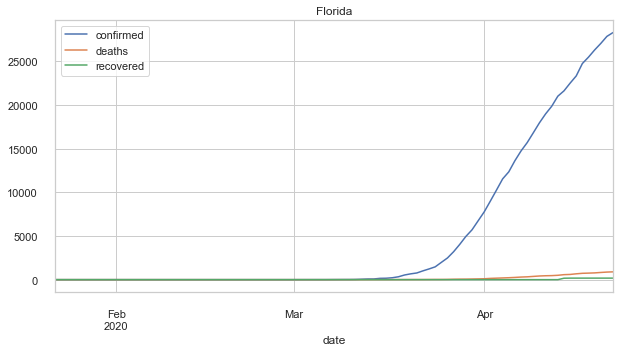

In [33]:
#plotting the graph
history.plot(figsize=(10,5), x="date", title=country_popn)

### Florida Counties

In [34]:
url = "https://raw.githubusercontent.com/gadenbuie/covid19-florida/master/data/covid-19-florida_pdf_cases_county.csv"
#this csv file contains data from daily cases from all florida counties 
df = pd.read_csv(url, error_bad_lines=False)

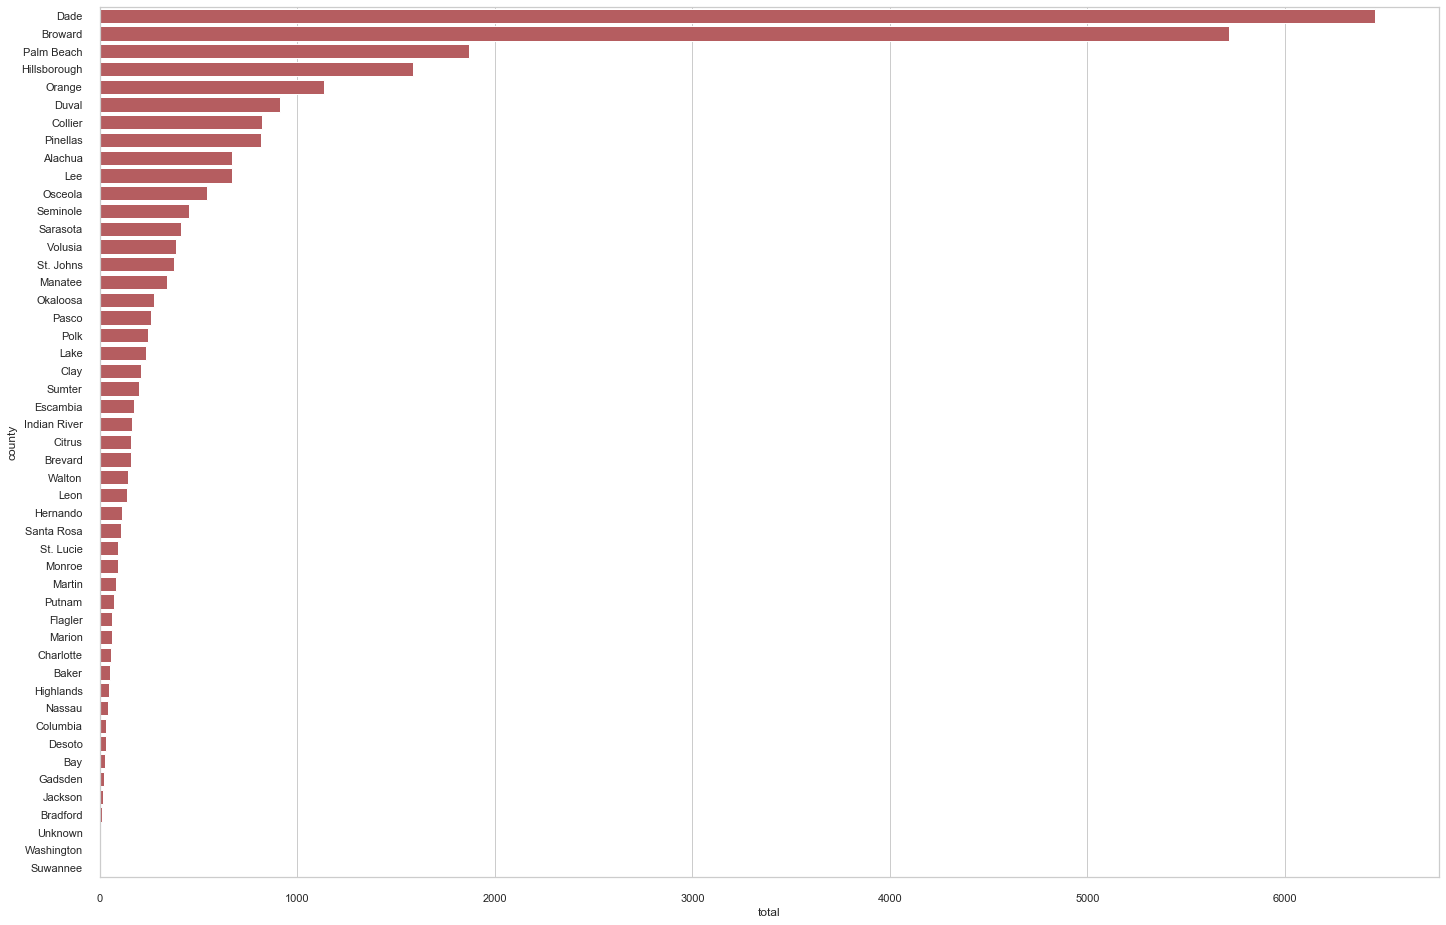

In [35]:
data=df[["county","total"]]
data2=data.set_index('county')
df_sum=data2.groupby(['county']).sum()
f,ax = plt.subplots(figsize=(24,16))
df_sum['county'] = df_sum.index
data=df_sum[["county","total"]]
data.sort_values("total",ascending=False,inplace=True)
sns.barplot(x="total",y="county",data=data,label="Total", color="r")

### Leon County data


In [36]:
url = "https://raw.githubusercontent.com/gadenbuie/covid19-florida/master/data/covid-19-florida_arcgis_cases-by-day.csv"
df3 = pd.read_csv(url, error_bad_lines=False)
df_leon=df3.loc[df3['county'] == "Leon"]
df_leon2=df_leon.loc[df3["timestamp"]=="2020-04-15T120029"]

In [37]:
import plotly.express as px
fig=px.bar(df_leon2,x='date',y='frequency')
fig.update_layout(title_text="COVID-19 cases in Leon County on daily basis")
fig.show() #plooting the cases in Leon County

### Comparison of daily cases between Leon and Dade County


In [38]:
url = "https://raw.githubusercontent.com/gadenbuie/covid19-florida/master/data/covid-19-florida_arcgis_cases-by-day.csv"
df3 = pd.read_csv(url, error_bad_lines=False)
df_dade=df3.loc[df3['county'] == "Dade"]
df_dade2=df_dade.loc[df3["timestamp"]=="2020-04-15T120029"]

In [39]:
fig2=px.bar(df_dade2,x='date',y='frequency')
fig2.update_layout(title_text="COVID-19 cases in Miami-Dade County on daily basis")
fig2.show()

### Forecasting cases using Prophet

In [40]:
from fbprophet import Prophet

### Prediction for daily cases in Leon County for the next 30 days.

In [41]:
df_leon2
df_leonpred = df_leon2[['date','frequency']]
df_leonpred=df_leonpred.rename(columns={"date": "ds", "frequency": "y"})
df_leonpred

ds   y
22394  2020-03-25   1
22433  2020-03-26   4
22478  2020-03-18   3
22558  2020-03-24   2
22594  2020-03-22   1
22634  2020-03-04   1
22740  2020-03-21   1
22774  2020-03-27   3
22835  2020-04-01   5
22880  2020-04-03   7
22940  2020-03-31   4
23047  2020-03-30   6
23103  2020-03-29   1
23131  2020-04-04   3
23181  2020-04-06  12
23232  2020-04-09   7
23279  2020-04-10  29
23324  2020-04-11   3
23371  2020-04-12  32
23382  2020-04-05  10
23433  2020-04-08   4
23480  2020-04-07   6
23564  2020-04-13   5
23606  2020-04-14   1
23641  2020-04-15   1

In [42]:
m1 = Prophet()
m1.fit(df_leonpred)
future1=m1.make_future_dataframe(periods=30)
forecast1 = m1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #getting the prediction for future data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


ds       yhat  yhat_lower  yhat_upper
50 2020-05-11  17.523771   10.000707   25.140925
51 2020-05-12  14.077474    6.373051   21.240931
52 2020-05-13  15.617929    7.815999   23.307493
53 2020-05-14  17.317754    9.453443   24.319415
54 2020-05-15  24.837160   17.048964   32.510146

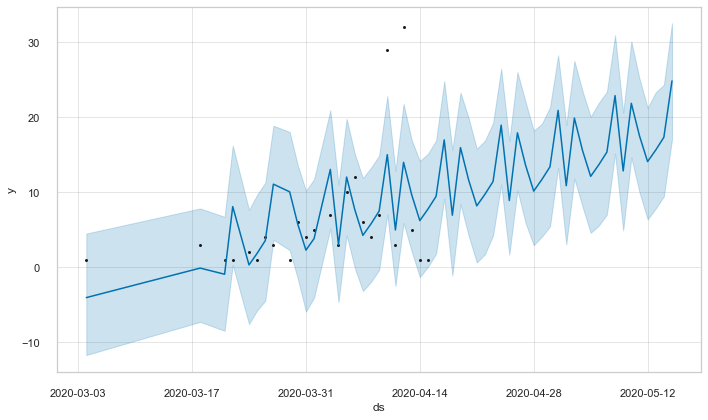

In [43]:
fig1 = m1.plot(forecast1) #plotting the prediction of daily new cases

### Prediction for total cases in Leon County for the next 30 days.


In [44]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df4 = pd.read_csv(url, error_bad_lines=False)
df_leon3=df4.loc[df4['county'] == "Leon"]
df_leon3=df_leon3.loc[df_leon3["state"]=="Florida"]
df_leon3

date county    state     fips  cases  deaths
3867   2020-03-18   Leon  Florida  12073.0      1       0
4535   2020-03-19   Leon  Florida  12073.0      3       0
5314   2020-03-20   Leon  Florida  12073.0      4       0
6243   2020-03-21   Leon  Florida  12073.0      4       0
7283   2020-03-22   Leon  Florida  12073.0      4       0
8429   2020-03-23   Leon  Florida  12073.0      5       0
9676   2020-03-24   Leon  Florida  12073.0      6       0
11054  2020-03-25   Leon  Florida  12073.0      7       0
12608  2020-03-26   Leon  Florida  12073.0     12       0
14288  2020-03-27   Leon  Florida  12073.0     15       0
16084  2020-03-28   Leon  Florida  12073.0     17       0
17989  2020-03-29   Leon  Florida  12073.0     16       0
19984  2020-03-30   Leon  Florida  12073.0     21       0
22076  2020-03-31   Leon  Florida  12073.0     26       0
24250  2020-04-01   Leon  Florida  12073.0     32       0
26490  2020-04-02   Leon  Florida  12073.0     34       0
28788  2020-04-03   Leon  Florida  12073.0     38       0
31150  2020-04-04   Leon  Florida  12073.0     41       0
33557  2020-04-05   Leon  Florida  12073.0     41       0
36006  2020-04-06   Leon  Florida  12073.0     58       0
38496  2020-04-07   Leon  Florida  12073.0     67       0
41038  2020-04-08   Leon  Florida  12073.0     71       0
43604  2020-04-09   Leon  Florida  12073.0     77       0
46202  2020-04-10   Leon  Florida  12073.0     90       0
48832  2020-04-11   Leon  Florida  12073.0    112       0
51492  2020-04-12   Leon  Florida  12073.0    119       0
54173  2020-04-13   Leon  Florida  12073.0    149       0
56866  2020-04-14   Leon  Florida  12073.0    149       0
59574  2020-04-15   Leon  Florida  12073.0    155       0
62297  2020-04-16   Leon  Florida  12073.0    164       0
65032  2020-04-17   Leon  Florida  12073.0    173       1
67782  2020-04-18   Leon  Florida  12073.0    168       1
70544  2020-04-19   Leon  Florida  12073.0    175       1
73314  2020-04-20   Leon  Florida  12073.0    183       1
76091  2020-04-21   Leon  Florida  12073.0    185       1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


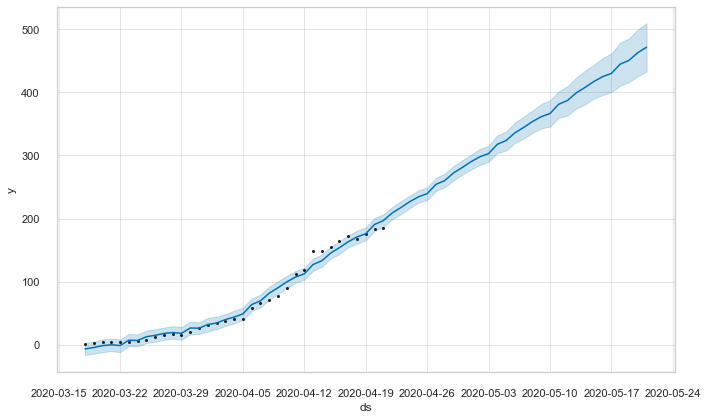

In [45]:
df_leonpred1 = df_leon3[['date','cases']]
df_leonpred1=df_leonpred1.rename(columns={"date": "ds", "cases": "y"})
m2 = Prophet()
m2.fit(df_leonpred1)
future2=m2.make_future_dataframe(periods=30)
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig2 = m2.plot(forecast2)

### Prediction for total cases in Dade County for the next 30 days.

In [46]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df5 = pd.read_csv(url, error_bad_lines=False)
df_dade3=df5.loc[df5['county'] == "Miami-Dade"]
df_dade3=df_dade3.loc[df_dade3["state"]=="Florida"]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


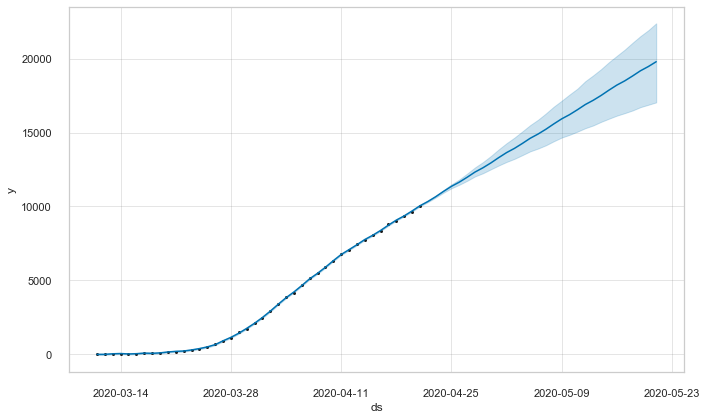

In [47]:
df_dadepred = df_dade3[['date','cases']]
df_dadepred=df_dadepred.rename(columns={"date": "ds", "cases": "y"})
df_dadepred['ds']=pd.to_datetime(df_dadepred['ds'])
m3 = Prophet()
m3.fit(df_dadepred)
future3=m3.make_future_dataframe(periods=30)
future3.tail()
forecast3 = m3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig3 = m3.plot(forecast3)

### Prediction for total cases in the U.S. for the next 30 days.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


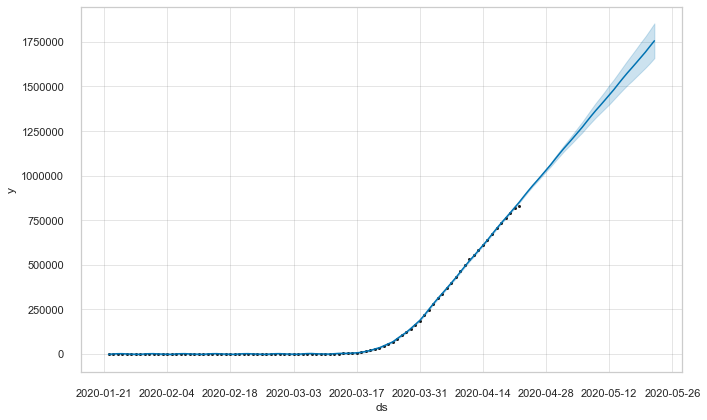

In [48]:
data_us = getStats("US") #using the function
jsonData = json.loads(data_us) 
country = jsonData["location"]["countryOrRegion"]
history_us = pd.DataFrame(jsonData["stats"]['history'])
history_us['date']=pd.to_datetime(history_us['date'])
df_histpred = history_us[['date','confirmed']]
df_histpred=df_histpred.rename(columns={"date": "ds", "confirmed": "y"})
df_histpred['ds']=pd.to_datetime(df_histpred['ds'])
m4 = Prophet()
m4.fit(df_histpred)
future4=m4.make_future_dataframe(periods=30)
future4.tail()
forecast4 = m4.predict(future4)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig4 = m4.plot(forecast4)
